In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr

In [3]:
df = pd.read_csv("/content/raw_data_frailty.csv")
df

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [4]:
df.shape

(10, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height         10 non-null     float64
 1   Weight         10 non-null     int64  
 2   Age            10 non-null     int64  
 3   Grip strength  10 non-null     int64  
 4   Frailty        10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


In [6]:
df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip strength,int64
Frailty,object


In [7]:
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip strength,0
Frailty,0


In [8]:
# Convert 'Frailty' to binary (0 = No, 1 = Yes)
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

In [9]:
df

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


In [10]:
df.to_csv('cleaned_.csv', index=False)

In [11]:
# Summary Statistics
print("Summary Statistics:")
summary_stats = df.describe()

Summary Statistics:


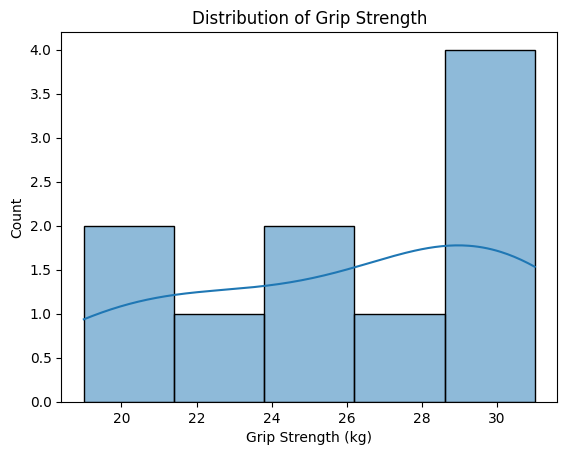

In [12]:
# Visualizations
sns.histplot(df['Grip strength'],bins=5, kde=True)
plt.title('Distribution of Grip Strength')
plt.xlabel('Grip Strength (kg)')
plt.show()
plt.savefig("Distribution of Grip Strength.png")  # Save as PNG
plt.close()

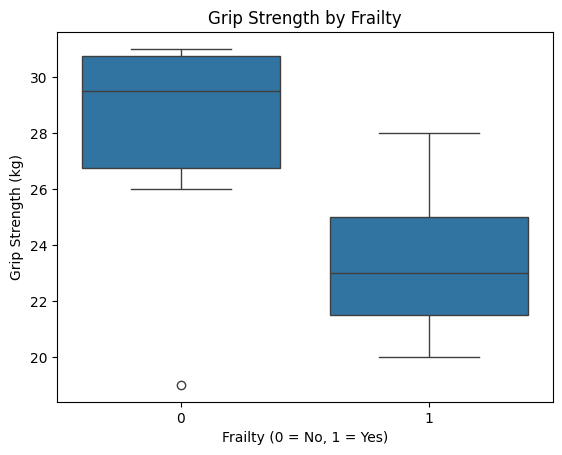

In [13]:
sns.boxplot(x=df['Frailty'], y=df['Grip strength'])
plt.title('Grip Strength by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength (kg)')
plt.show()
plt.savefig("Grip Strength by Frailty.png")
plt.close()

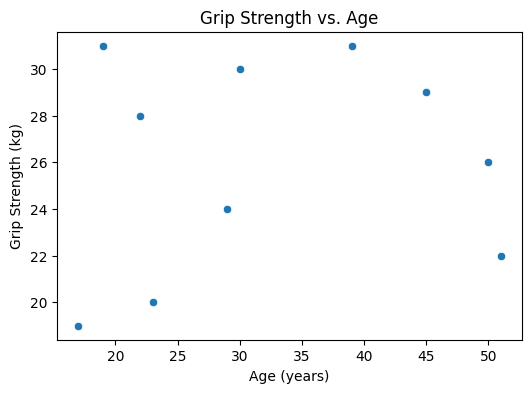

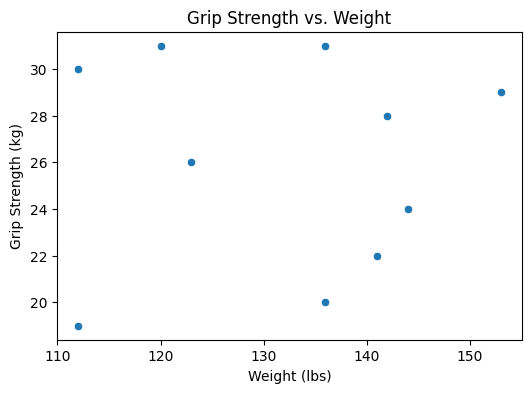

In [14]:
# Scatter plot: Grip Strength vs. Age
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Grip strength'])
plt.title('Grip Strength vs. Age')
plt.xlabel('Age (years)')
plt.ylabel('Grip Strength (kg)')
plt.show()
plt.savefig("Grip Strength vs Age.png")
plt.close()

# Scatter plot: Grip Strength vs. Weight
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Weight'], y=df['Grip strength'])
plt.title('Grip Strength vs. Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Grip Strength (kg)')
plt.show()
plt.savefig("Grip Strength vs Weight.png")
plt.close()

In [15]:
# Correlation Analysis
corr_grip_age, _ = pearsonr(df['Grip strength'], df['Age'])
corr_grip_weight, _ = pearsonr(df['Grip strength'], df['Weight'])
print(f'Correlation (Grip Strength vs Age): {corr_grip_age:.2f}')
print(f'Correlation (Grip Strength vs Weight): {corr_grip_weight:.2f}')

Correlation (Grip Strength vs Age): 0.13
Correlation (Grip Strength vs Weight): 0.03


In [16]:
# T-test: Grip Strength Difference Between Frail & Non-Frail Groups
group1 = df[df['Frailty'] == 0]['Grip strength']
group2 = df[df['Frailty'] == 1]['Grip strength']
#print(group1)
#print(group2)
t_stat, p_value = ttest_ind(group1, group2)
print(f'T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

T-test: t-statistic = 1.53, p-value = 0.1645


In [17]:
with open("results.txt", "w") as file:
    file.write("Summary Statistics:\n")
    file.write(summary_stats.to_string())  # Save summary statistics

    file.write("\n\nCorrelation Analysis:\n")
    file.write(f"Correlation (Grip Strength vs Age): {corr_grip_age:.2f}\n")
    file.write(f"Correlation (Grip Strength vs Weight): {corr_grip_weight:.2f}\n")

    file.write("\n\nT-test Analysis:\n")
    file.write(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}\n")

In [18]:
# Conclusion
if p_value < 0.05:
    print("Significant difference in grip strength between frail and non-frail groups.")
else:
    print("No significant difference in grip strength between frail and non-frail groups.")

No significant difference in grip strength between frail and non-frail groups.


Question 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df1 = pd.read_csv('/content/StudentsPerformance.csv')
df1.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [20]:
df1.shape

(1000, 8)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [22]:
df1.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [23]:
df1.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [24]:
df1 = df1.drop_duplicates()
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [25]:
#Compute Final Grade (Average of Math, Reading, and Writing scores)
df1['final_grade'] = df1[['math score', 'reading score', 'writing score']].mean(axis=1)
df1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,final_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


In [26]:
df1.shape

(1000, 9)

In [27]:
df1.to_csv('cleaned_data.csv', index=False)

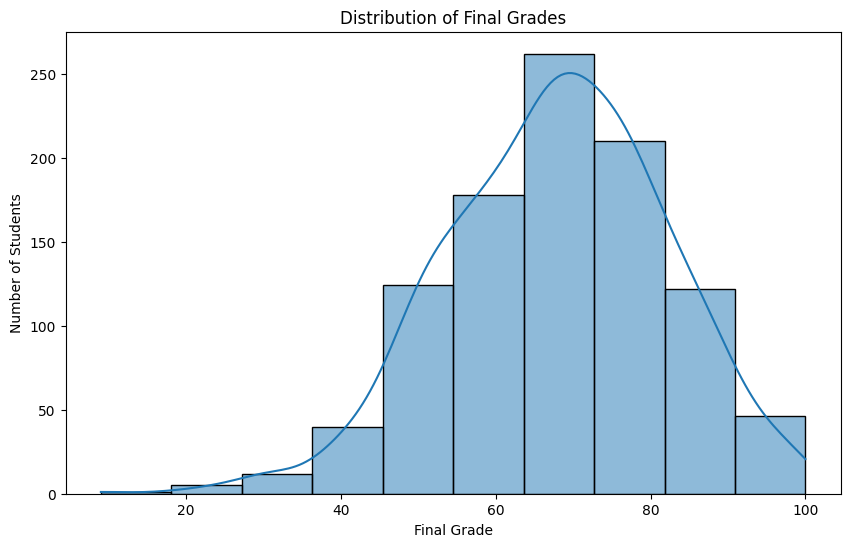

In [28]:
# 1. Distribution of Final Grades
plt.figure(figsize=(10, 6))
sns.histplot(df1['final_grade'], bins=10, kde=True)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.show()
plt.savefig("Distribution of Final Grades.png")
plt.close()

<Figure size 1000x600 with 0 Axes>

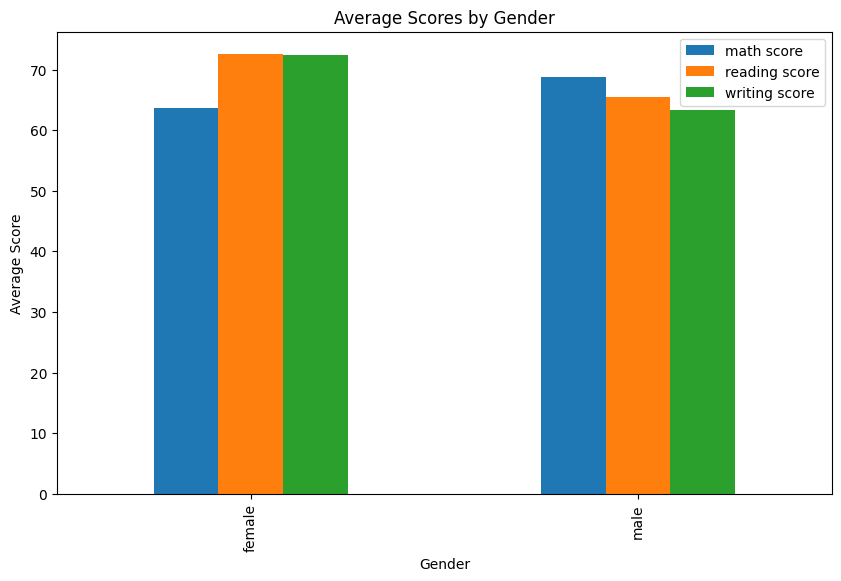

In [29]:
# 2. Gender vs. Average Scores
plt.figure(figsize=(10, 6))
gender_avg_scores = df1.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
gender_avg_scores.plot(kind='bar', x='gender', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.show()
plt.savefig("Average Scores by Gender.png")
plt.close()

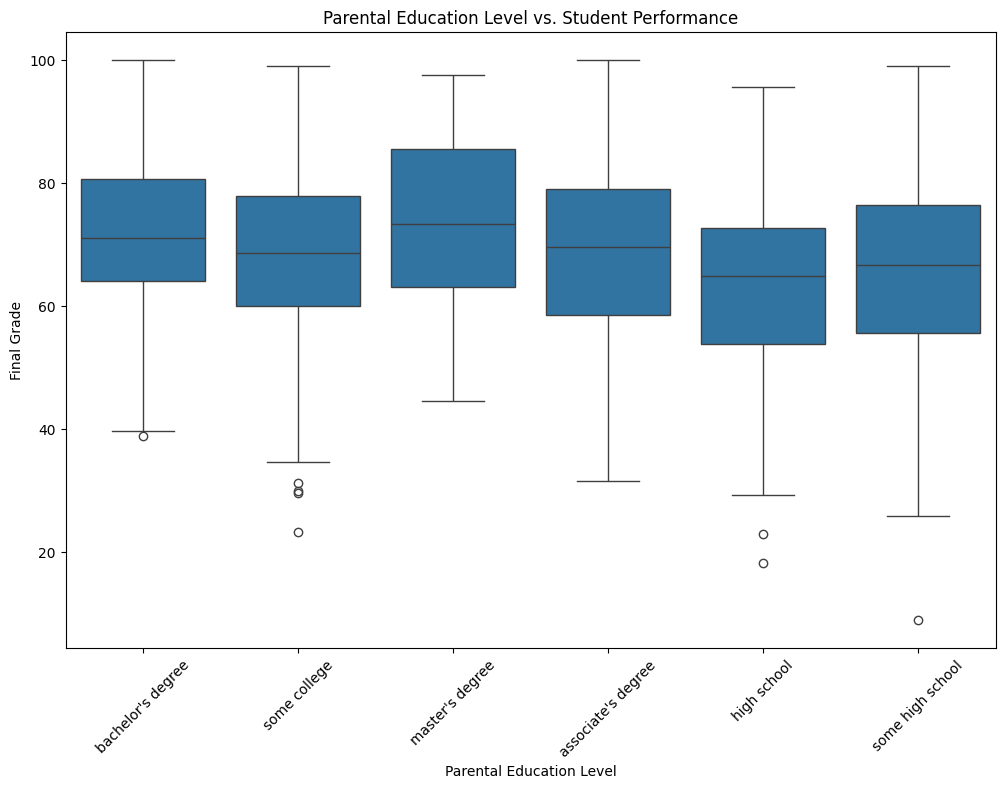

In [30]:
# 3. Parental Education Level vs. Student Performance
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental level of education', y='final_grade', data=df1)
plt.title('Parental Education Level vs. Student Performance')
plt.xlabel('Parental Education Level')
plt.ylabel('Final Grade')
plt.xticks(rotation=45)
plt.show()
plt.savefig('Parental Education Level vs. Student Performance.png')
plt.close()

In [31]:
# Categorizing Final Grade into Pass/Fail
df1['grade_category'] = df1['final_grade'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

<Figure size 800x800 with 0 Axes>

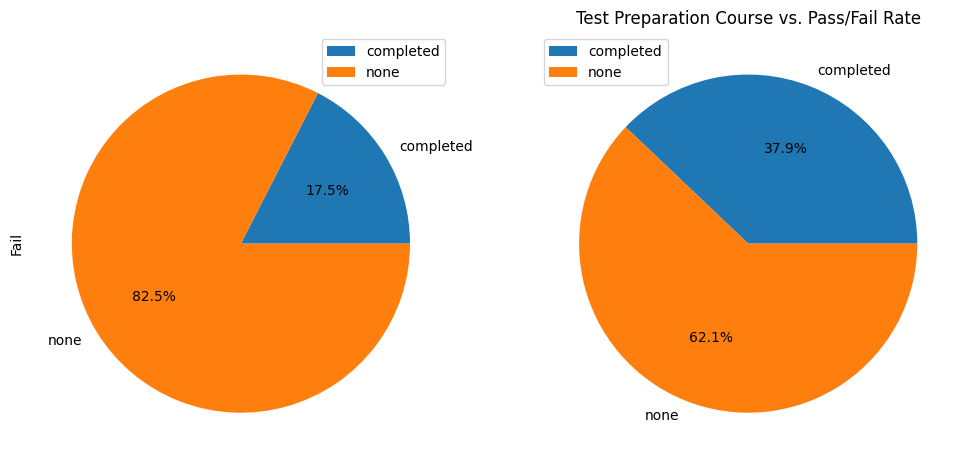

In [32]:
# 4. Test Preparation Course vs. Final Grade Rate
plt.figure(figsize=(8, 8))
prep_course_counts = df1.groupby('test preparation course')['grade_category'].value_counts().unstack()
prep_course_counts.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%')
plt.title('Test Preparation Course vs. Pass/Fail Rate')
plt.ylabel('')
plt.show()
plt.savefig("Test Preparation Course vs Pass or Fail Rate.png")
plt.close()


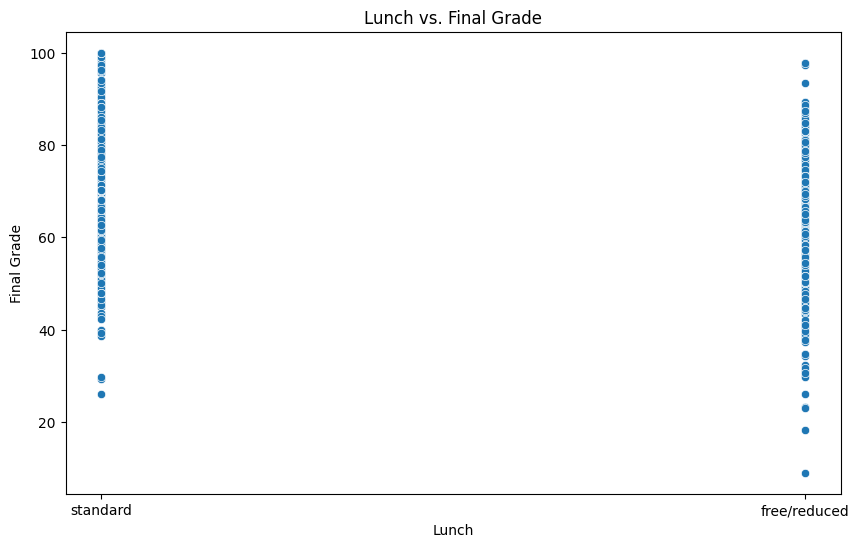

In [33]:
# 5. Lunch Type vs. Final Grade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lunch', y='final_grade', data=df1)
plt.title('Lunch vs. Final Grade')
plt.xlabel('Lunch')
plt.ylabel('Final Grade')
plt.show()
plt.savefig('Lunch vs. Final Grade.png')
plt.close()